In [ ]:
pip install pandas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

1. Realice la búsqueda de un conjunto de datos de mínimo 1000 registros, donde pueda obtener información correspondiente al sector asignado y al cual se le pueda aplicar el método de RBNN. Adjunte enlace de acceso al dataset (enlace de la página de donde obtuvo los datos)

In [ ]:
print("https://www.kaggle.com/code/benroshan/transaction-fraud-detection/input")

https://www.kaggle.com/code/benroshan/transaction-fraud-detection/input


2. Realice la lectura del banco de datos e imprima las categorías que tiene y cuales son las variables dependientes e independientes.

In [ ]:
df_fraud = pd.read_excel('data_fraud.xlsx', sheet_name='data')
df_fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
for columna in df_fraud.columns:
    print(f"Categoría -- '{columna}'")

Categoría -- 'step'
Categoría -- 'type'
Categoría -- 'amount'
Categoría -- 'nameOrig'
Categoría -- 'oldbalanceOrg'
Categoría -- 'newbalanceOrig'
Categoría -- 'nameDest'
Categoría -- 'oldbalanceDest'
Categoría -- 'newbalanceDest'
Categoría -- 'isFraud'
Categoría -- 'isFlaggedFraud'


Variables independientes

In [ ]:
df_fraud[["step", "type", "amount", "oldbalanceOrg", "newbalanceOrig", "isFlaggedFraud"]]

,step,type,amount,oldbalanceOrg,newbalanceOrig,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0
2,1,TRANSFER,181.00,181.00,0.00,0
3,1,CASH_OUT,181.00,181.00,0.00,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0
...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,479803.00,347245.65,0
1048571,95,PAYMENT,9917.36,90545.00,80627.64,0
1048572,95,PAYMENT,14140.05,20545.00,6404.95,0
1048573,95,PAYMENT,10020.05,90605.00,80584.95,0


Variable dependiente

In [ ]:
df_fraud[["isFraud"]]

,isFraud
0,0
1,0
2,1
3,1
4,0
...,...
1048570,0
1048571,0
1048572,0
1048573,0


array([[<Axes: title={'center': 'step'}>,
        <Axes: title={'center': 'amount'}>,
        <Axes: title={'center': 'oldbalanceOrg'}>],
       [<Axes: title={'center': 'newbalanceOrig'}>,
        <Axes: title={'center': 'oldbalanceDest'}>,
        <Axes: title={'center': 'newbalanceDest'}>],
       [<Axes: title={'center': 'isFraud'}>,
        <Axes: title={'center': 'isFlaggedFraud'}>, <Axes: >]],
      dtype=object)

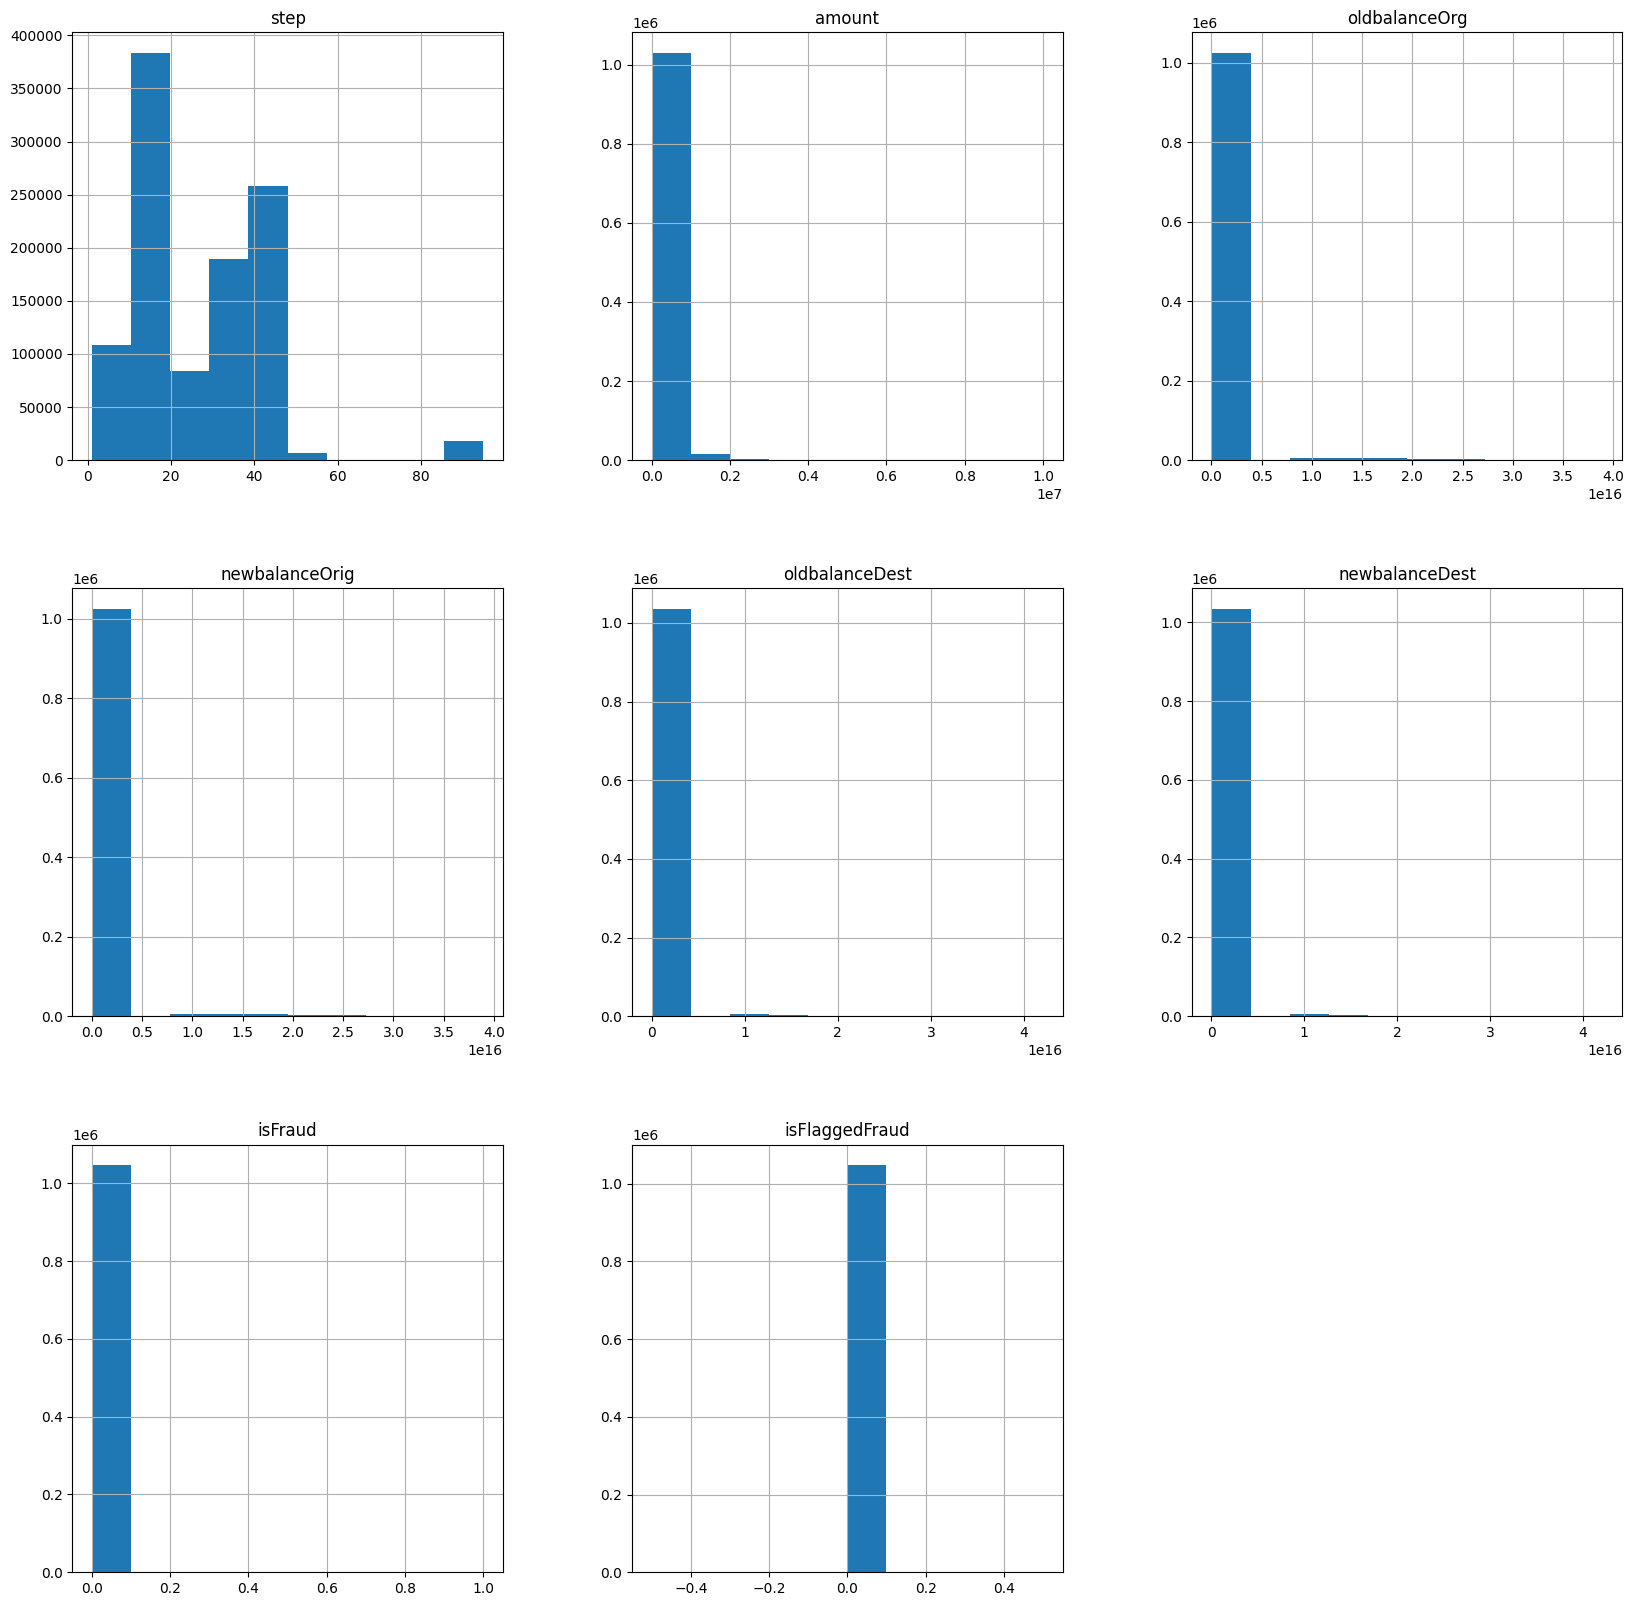

In [ ]:
df_fraud.hist(figsize=(20,20))

3. Realice el proceso de limpieza de los datos, justificando cada una de las etapas utilizadas.

Se realiza división de datos partiendo de la variable de clasificación isFraud, por lo que se divide el data frame de más de 1 millón de datos en 2284

         step      type      amount     nameOrig  oldbalanceOrg  \
939536     43   CASH_IN   149152.92   C532400860       52679.00   
612979     34   CASH_IN   170234.08  C1410895046        2723.00   
583000     33  CASH_OUT    99727.50  C1060972913       21129.00   
147533     12   PAYMENT    18065.94  C1274736812           0.00   
530773     20  TRANSFER    43627.23   C779675334           0.00   
...       ...       ...         ...          ...            ...   
1030717    86  TRANSFER    17822.02  C1763423014       17822.02   
1030768    91  CASH_OUT   482679.60  C1126237876      482679.60   
1044779    94  TRANSFER   445257.43  C1313587911      445257.43   
1030533    71  TRANSFER  1871553.73   C677678546     1871553.73   
1041700    94  TRANSFER   460635.82  C1586676521      460635.82   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
939536        201831.92  C1098293483            0.00            0.00        0   
612979        172957.08   C617376

array([[<Axes: title={'center': 'step'}>,
        <Axes: title={'center': 'amount'}>,
        <Axes: title={'center': 'oldbalanceOrg'}>],
       [<Axes: title={'center': 'newbalanceOrig'}>,
        <Axes: title={'center': 'oldbalanceDest'}>,
        <Axes: title={'center': 'newbalanceDest'}>],
       [<Axes: title={'center': 'isFraud'}>,
        <Axes: title={'center': 'isFlaggedFraud'}>, <Axes: >]],
      dtype=object)

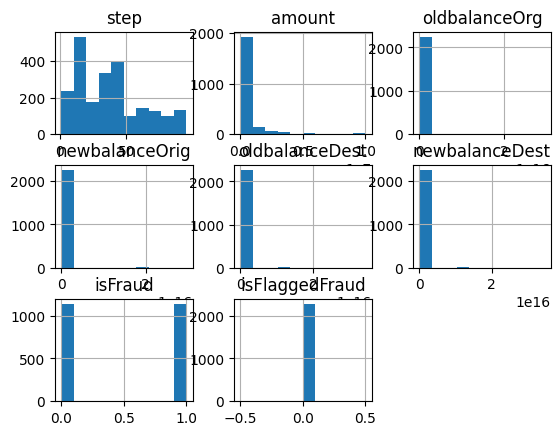

In [ ]:
# Dividir el DataFrame en dos basado en los valores de 'isFraud'
fraud_0 = df_fraud[df_fraud['isFraud'] == 0]
fraud_1 = df_fraud[df_fraud['isFraud'] == 1]

#Tomar una muestra aleatoria del mismo tamaño de ambas partes
sample_size = 1142

fraud_0_sample = fraud_0.sample(n=sample_size, random_state=42)
fraud_1_sample = fraud_1.sample(n=sample_size, random_state=42)

# Concatenar las muestras para obtener el DataFrame final con igual cantidad de 0 y 1
df_bal = pd.concat([fraud_0_sample, fraud_1_sample])

print(df_bal)

print(len(df_bal))

df_bal.hist()

Se factoriza la columna type, que contenía el tipo de transacción que se estaba haciendo, pasándola a númerica

In [ ]:
df_bal['typeN'] = pd.factorize(df_bal['type'])[0]
df_bal

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,typeN
939536,43,CASH_IN,149152.92,C532400860,52679.00,201831.92,C1098293483,0.00,0.00,0,0,0
612979,34,CASH_IN,170234.08,C1410895046,2723.00,172957.08,C617376203,0.00,0.00,0,0,0
583000,33,CASH_OUT,99727.50,C1060972913,21129.00,0.00,C1803348615,88581.86,188309.36,0,0,1
147533,12,PAYMENT,18065.94,C1274736812,0.00,0.00,M483573807,0.00,0.00,0,0,2
530773,20,TRANSFER,43627.23,C779675334,0.00,0.00,C1646718574,84077.00,0.00,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1030717,86,TRANSFER,17822.02,C1763423014,17822.02,0.00,C2088891396,0.00,0.00,1,0,3
1030768,91,CASH_OUT,482679.60,C1126237876,482679.60,0.00,C842293503,0.00,482679.60,1,0,1
1044779,94,TRANSFER,445257.43,C1313587911,445257.43,0.00,C1637506717,0.00,0.00,1,0,3
1030533,71,TRANSFER,1871553.73,C677678546,1871553.73,0.00,C646623849,0.00,0.00,1,0,3


In [ ]:
df_bal = df_bal.drop(columns=["isFlaggedFraud"])
df_bal = df_bal.drop(columns=["nameOrig"])
df_bal = df_bal.drop(columns=["nameDest"])
df_bal = df_bal.drop(columns=["type"])
df_bal.to_excel("new_data_fraud.xlsx", index=False)

**SE RECOMIENDA EMPEZAR LA REVISIÓN ACÁ**
**NOTA:** A partir de este momento se recomienda usar el nuevo dataframe ya que el dataframe original tiene más de 1 millón de datos, el nuevo tiene la limpieza que se realizó.

*Nuevo:* **new_data_fraud.xlsx**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df_new_fraud = pd.read_excel('new_data_fraud.xlsx')
df_new_fraud.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,typeN
0,43,149152.92,52679.0,201831.92,0.00,0.00,0,0
1,34,170234.08,2723.0,172957.08,0.00,0.00,0,0
2,33,99727.50,21129.0,0.00,88581.86,188309.36,0,1
3,12,18065.94,0.0,0.00,0.00,0.00,0,2
4,20,43627.23,0.0,0.00,84077.00,0.00,0,3


4. Para el caso de datos nulos o no válidos, realice el análisis de cuál es el mejor procedimiento para
realizar el tratamiento de esos datos y justfique cada uno de los procedimientos utlizados.

In [3]:
cantidad_nulos = df_new_fraud.isnull().sum()
print(cantidad_nulos)

step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
typeN             0
dtype: int64


No existen nulos

5. Realice un análisis de correlación y determine cuales de las variables del conjunto de datos tiene
correlación con la variable obje�vo, justifique su respuesta.

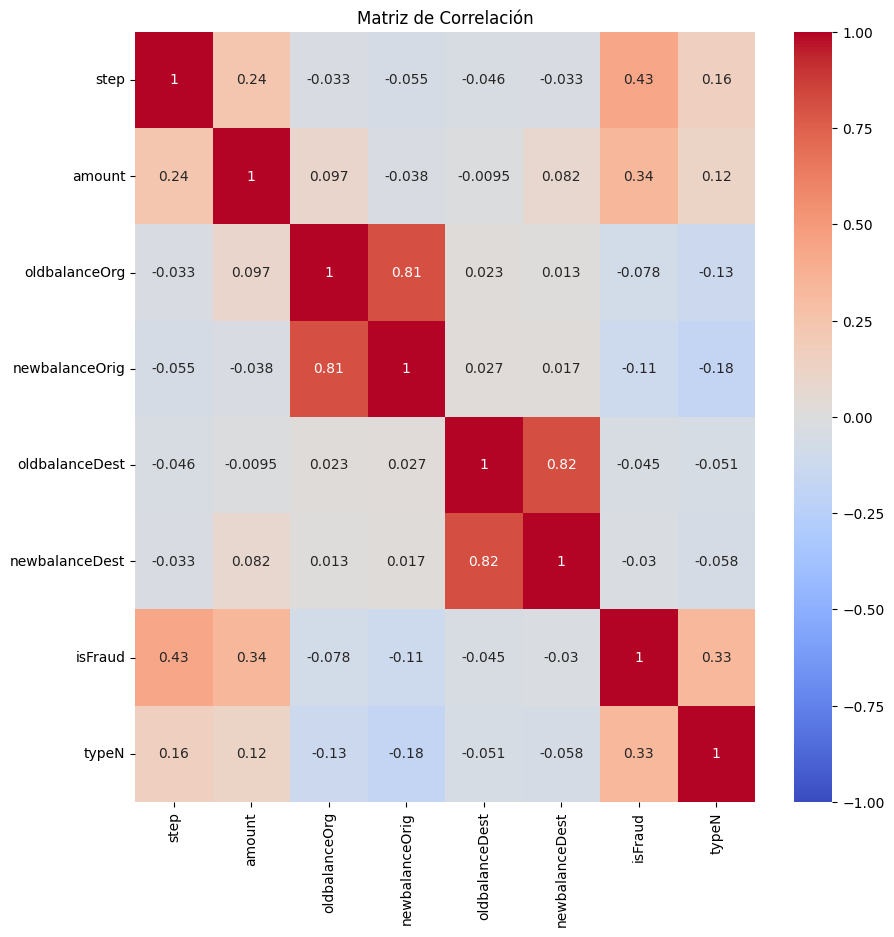

In [4]:
df_corr = df_new_fraud.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

In [5]:
df_new_fraud

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,typeN
0,43,149152.92,52679.00,201831.92,0.00,0.00,0,0
1,34,170234.08,2723.00,172957.08,0.00,0.00,0,0
2,33,99727.50,21129.00,0.00,88581.86,188309.36,0,1
3,12,18065.94,0.00,0.00,0.00,0.00,0,2
4,20,43627.23,0.00,0.00,84077.00,0.00,0,3
...,...,...,...,...,...,...,...,...
2279,86,17822.02,17822.02,0.00,0.00,0.00,1,3
2280,91,482679.60,482679.60,0.00,0.00,482679.60,1,1
2281,94,445257.43,445257.43,0.00,0.00,0.00,1,3
2282,71,1871553.73,1871553.73,0.00,0.00,0.00,1,3


Según la matriz de correlación las variables más correlación a la variable objetivo: step (paso de la transacción en la que se encontraba), amount (total de la transacción), typeN (tipo de transacción)

6. Divida el conjunto de datos así, 80% entrenamiento y 20% pruebas.

In [6]:
df_train, df_test = train_test_split(df_new_fraud, test_size=0.2, random_state=42)
print('df_train - ', len(df_train))
print('df_test - ', len(df_test))

X_train = df_train[["step", "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "typeN"]]
y_train = df_train[["isFraud"]]
x_test = df_test[["step", "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "typeN"]]
y_test = df_test[["isFraud"]]

df_train -  1827
df_test -  457


7. En caso de ser necesario transforme los atributos categóricos a numéricos. Explique la elección del
método utilizado para su conjunto de datos.

Se realizó anteriormente con el método factorize

8. Para el conjunto de datos de entrenamiento realice el escalado del conjunto (normalización o
estandarización) realice la justificación del método seleccionado para su conjunto de datos.

In [7]:
# Aplicar estandarización (Z-score)
std_scaler = StandardScaler()
X_train_standard = std_scaler.fit_transform(X_train)
x_test_standard = std_scaler.fit_transform(x_test)
X_train_standard

array([[ 2.15058623, -0.36240092, -0.12396597, ..., -0.08673713,
        -0.11732012,  1.34453161],
       [ 1.49179369,  1.15082894, -0.12396597, ..., -0.08673713,
        -0.11732012, -0.62142217],
       [ 0.38008129, -0.3959401 , -0.12396597, ..., -0.08673713,
        -0.11732012, -0.62142217],
       ...,
       [ 0.17420862, -0.39951554, -0.12396597, ..., -0.08673713,
        -0.11732012, -0.62142217],
       [-1.01985286, -0.43547093, -0.12396597, ..., -0.08673713,
        -0.11732012,  1.34453161],
       [-0.15518765, -0.39720266, -0.12396597, ..., -0.08673713,
        -0.11732012, -0.62142217]])

Esta estandarización favorece a las redes neuronales por la función sigmoide, ya que esta estandarización acerca los valores a 0, facilitando la convergencia y el entrenamiento de la red

9. Realice la implementación de la RBNN en su conjunto de datos, Defina la taza de aprendizaje y el error en 0.01 y 1e-7 respectivamente, justifique la técnica utilizada para definir el número de
centroides

In [8]:
X = df_new_fraud[["step", "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "typeN", "isFraud"]].values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

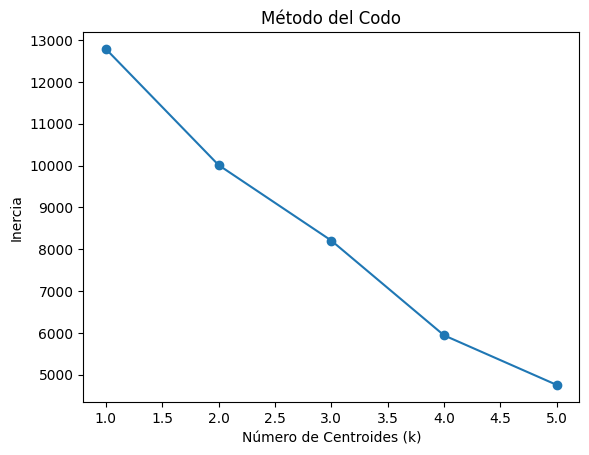

In [10]:
from sklearn.cluster import KMeans
import numpy as np

inertia_values = []
variance = []

for k in range(1, 6):  # Prueba para k desde 1 hasta 10
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train_standard)
    inertia_values.append(kmeans.inertia_)
    mean_inertia = np.mean(inertia_values)
    centroids = kmeans.cluster_centers_
    # Calcula las diferencias al cuadrado entre cada valor y la media
    squared_diffs = [(value - mean_inertia)**2 for value in inertia_values]
    # Calcula la varianza como la media de las diferencias al cuadrado
    variance.append(np.mean(squared_diffs))

plt.plot(range(1, 6), inertia_values, marker='o')
plt.xlabel('Número de Centroides (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

Este código está diseñado para realizar el método del codo en el contexto de aplicar el algoritmo de clustering KMeans a un conjunto de datos. El método del codo es una técnica común utilizada para determinar un valor adecuado para el parámetro "k", que representa el número de clusters a utilizar en el algoritmo KMeans.

In [11]:
variance

[0.0,
 1927613.2652542065,
 3552575.5975230583,
 6287916.815765738,
 8246419.485268417]

In [12]:
centroids

array([[ 0.01079052, -0.1890972 , -0.12396597, -0.11208293, -0.08673713,
        -0.11732012,  0.97909849],
       [-0.07457085, -0.19155781, -0.11576729, -0.09858933, -0.077837  ,
        -0.09882756, -0.80168762],
       [-0.44512499, -0.35463176,  6.98755796,  7.89904004,  0.21510963,
         0.11764427, -1.60439907],
       [ 0.94090683,  3.83208664,  0.43016136, -0.11208293, -0.08673713,
         0.3975891 ,  0.3728533 ],
       [-0.61052955, -0.07783789, -0.12396597, -0.11208293,  8.32349778,
         8.51591556, -0.39013349]])

In [13]:
import numpy as np

#Función que realiza la función gaussiana
def rbf_activation(x, c, var):
    return np.exp(-np.sum((x - c)**2) / (2 * var))

#Aplicar función gaussiana a las entradas dadas
def rbf_neural_network(input_data):
    num_centroids = centroids.shape[0]
    output = np.zeros(num_centroids)

    for i in range(num_centroids):
        output[i] = rbf_activation(input_data, centroids[i], variance[i])

    return output

outputs = []

#ciclo para recorrer todos los datos y guardarlos en un array
for data_point in X_train_standard:
    output = rbf_neural_network(data_point)
    outputs.append(output)

print("Salidas de la red neuronal RBF para todos los ejemplos:")
for output in outputs:
    print(output)


<ipython-input-13-b5a5ce6f5787>:5: RuntimeWarning: divide by zero encountered in double_scalars
  return np.exp(-np.sum((x - c)**2) / (2 * var))


Salidas de la red neuronal RBF para todos los ejemplos:
[0.         0.99999751 0.99998166 0.99999836 0.99999054]
[0.         0.99999889 0.99998285 0.99999928 0.99999083]
[0.         0.99999993 0.9999836  0.99999843 0.99999112]
[0.         0.99997786 0.99999418 0.99999137 0.999986  ]
[0.         0.99999926 0.99998308 0.99999892 0.99999091]
[0.         0.99999979 0.99998366 0.99999817 0.99999118]
[0.         0.99999978 0.99998366 0.99999815 0.99999117]
[0.         0.99999964 0.99998337 0.99999847 0.99999101]
[0.         0.99999938 0.99998323 0.99999819 0.99999114]
[0.         0.99999721 0.99998161 0.9999979  0.99999073]
[0.         0.99999872 0.9999826  0.99999833 0.99999101]
[0.         0.99999951 0.99998327 0.99999828 0.99999115]
[0.         0.99999864 0.99998242 0.99999855 0.9999909 ]
[0.         0.99999983 0.99998381 0.9999983  0.99999109]
[0.         0.99999875 0.9999825  0.99999871 0.99999095]
[0.         0.99999998 0.99998365 0.99999852 0.99999116]
[0.         0.99999763 0.9999821

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

#clf = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=1000, random_state=42)
clf = MLPClassifier(hidden_layer_sizes=(1,), max_iter=1000, random_state=42, learning_rate_init=0.01, alpha=0.0000001)
clf.fit(outputs, y_train)

# Realizar predicciones en el conjunto de prueba
#y_pred = clf.predict(x_test_standard)

# Calcular la precisión
#accuracy = accuracy_score(y_test, y_pred)
#print("Precisión:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(alpha=1e-07, hidden_layer_sizes=(1,), learning_rate_init=0.01,
              max_iter=1000, random_state=42)

Se realiza método del codo para encontra número de centroides. Según el KMeans, son 3, pero al ensayo de prueba y error, las capas ocultas parecen dar una mejor precisión de 50 x 30

10. Valide utilizando el método de validación cruzada por lo menos 3 topologías de la red e imprima los
resultados para cada topología y justifique la elección de la topología implementada.

In [15]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Define diferentes tipologías de redes
networks = [
    MLPClassifier(hidden_layer_sizes=(3,), max_iter=100, learning_rate_init=0.01, alpha=0.000001),
    MLPClassifier(hidden_layer_sizes=(10,20), max_iter=100, learning_rate_init=0.001, alpha=0.0000001),
    MLPClassifier(hidden_layer_sizes=(50,30), max_iter=100, learning_rate_init=0.001, alpha=0.0000001),
]

# Realiza la validación cruzada para cada red y obtén las puntuaciones
for idx, network in enumerate(networks):
    scores = cross_val_score(network, X_train, y_train, cv=5)  # Ajusta el número de divisiones (cv) s
    print(f"Red {idx+1}: Precisión promedio: {np.mean(scores):.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed w

Red 1: Precisión promedio: 0.5894


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed w

Red 2: Precisión promedio: 0.7478


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed w

Red 3: Precisión promedio: 0.8544


COmo se mencion+o anterior mente la red 50x30 presentaba una mayor precisión, por lo que se refiere a la capacidad de asimilación de datos con mayor cantidad de neuronas

11. Realice la validación con su conjunto de datos de pruebas, imprima la matriz de confusión si su ejercicio es de clasificación y explique los resultados. Si su ejercicio es de aproximación de funciones
imprima el error cuadrá�co medio de las predicciones y explique su respuesta.

<ipython-input-13-b5a5ce6f5787>:5: RuntimeWarning: divide by zero encountered in double_scalars
  return np.exp(-np.sum((x - c)**2) / (2 * var))


Precisión: 0.5032822757111597


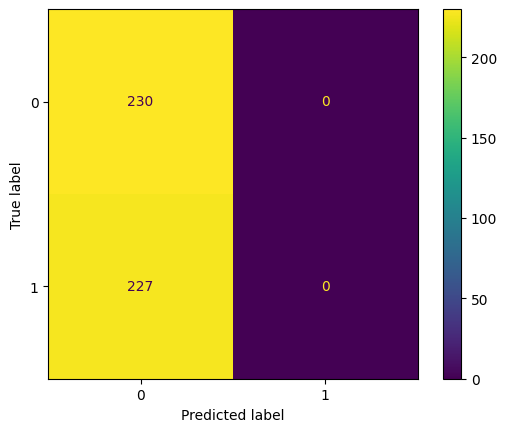

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

x_test_list = []

for data_point in x_test_standard:
    output = rbf_neural_network(data_point)
    x_test_list.append(output)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(x_test_list)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

matriz_confusion = confusion_matrix(y_test, y_pred)

# Crear la visualización de la matriz de confusión
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz_confusion)

# Graficar la matriz de confusión
cm_display.plot()
plt.show()

Hubo 230 casos que fueron correctamente clasificados como la clase negativa (clase "0").

Esto significa que hubo 227 casos que fueron incorrectamente clasificados como la clase negativa (clase "0") cuando en realidad pertenecían a la clase positiva (clase "1").

En resumen, la matriz de confusión muestra cómo el modelo ha realizado las predicciones en términos de aciertos y errores en las clases positiva y negativa. Esta información es útil para evaluar el rendimiento y la precisión del modelo de clasificación.

In [17]:
matriz_confusion

array([[230,   0],
       [227,   0]])